# $$\textbf{J.MARS} \color{red}{\text{ LAB}} $$
---------------------

-------------------------

# $\textbf{CHAPTER 01}$ : LOGIC - ALGEBRA BOOL.

--------------
# $$\bullet \textbf{ Logical Symbolisms} :$$

## $\bullet$ And : $\wedge$ : `$\wedge$`
## $\bullet$ Or : $\lor$ :  `$\lor$`
## $\bullet$ Iff : $\iff$ : `$\iff$`
## $\bullet$ Implies : $\implies$ : `$\implies$`
## $\bullet$ Xor : $\oplus$ : `$\oplus$`

## $\bullet$ Denote:  $\quad\color{green}{1}:$ `True`  $\quad$  $\color{red}{0}$ : `False` 

-----------------

In [1]:
import pandas as pd
from numpy import prod

In [2]:
D = {
    'A' : [True,False,1],
    'B' : [True,True,1],
    'C' : [True,False,1],
    'D' : [True,False,1]
}
df = pd.DataFrame(D)
df

,A,B,C,D
0,True,True,True,True
1,False,True,False,False
2,1,1,1,1


In [3]:
D2 = {
    'E' : [1,1],
    'F' : [1,0],
    'G' : [1,0]
}
DF = pd.DataFrame(D2)
DF

,E,F,G
0,1,1,1
1,1,0,0


In [73]:
def  oper(A): #len(A)==2
    if len(A)==2:
        if bool(A[0])==1 and bool(A[1])==1:
            res = [True]
        elif bool(A[0])==1 and bool(A[1])==0:
            res = [False]
        elif bool(A[0])==0 and bool(A[1])==0:
            res = [True]
        elif bool(A[0])==0 and bool(A[1])==1:
            res = [True]
    else:
        return None
    
    return res[0]


def imp_oper(A):
    new=[]
    while len(A)>2:
        if bool(A[0])==1 and bool(A[1])==1:
            new = [True]
        elif bool(A[0])==1 and bool(A[1])==0:
            new = [False]
        elif bool(A[0])==0 and bool(A[1])==0:
            new = [True]
        elif bool(A[0])==0 and bool(A[1])==1:
            new = [True]
        if len(A)>3:
            A = new+A[2:]
        elif len(A)==3:
            A = new+[bool(A[-1])]
    new_A = list(map(bool,A))
    return new_A

def  Xoper(A): #len(A)==2
    if len(A)==2:
        res = [bool(A[0]^A[1])]
    else:
        return None
    
    return res[0]


def Xor_oper(A):
    new=[]
    while len(A)>2:
        new = [A[0]^A[1]]
        if len(A)>3:
            A = new+A[2:]
        elif len(A)==3:
            A = new+[bool(A[-1])]
    new_A = list(map(bool,A))
    return new_A



def bool_map(A):
    result = []
    for i in range(len(A)):
        if A[i]==True:
            result.append('$\color{green}{1}$')
        elif A[i]==False:
            result.append('$\color{red}{0}$')
        else:
            result.append(A[i])
    return result


class Logic:
    
    def __init__(self,df):
        self.df = df
    def __repr__(self):
        return f'{self.df}'
    def __str__(self):
        return f'{self.df}'
    def __add__(self,other):
        return Logic(pd.concat([self.df, other.df], axis=1, join='inner'))
    
    def Or(self):
        OR=[]
        for i in range(len(self.df)):
            line = list(self.df.loc[i])
            OR.append(bool(any(line)))
        L = list(self.df.columns)
        name = len(L)*'{}$\lor$'
        df_or = pd.DataFrame({ '('+name[:-6].format(*L)+')' : bool_map(OR)})
        return df_or
    
    def And(self):
        AND=[]
        for i in range(len(self.df)):
            line = list(self.df.loc[i])
            if line != [1]*len(line) and line != [True]*len(line):
                AND.append(not any(list(self.df.loc[[i]])))
            else:
                AND.append(True)
        L = list(self.df.columns)
        name = len(L)*'{}$\wedge$'
        df_and = pd.DataFrame({ '('+name[:-8].format(*L)+')' : bool_map(AND)})
        return df_and
    
    def iff(self):
        iff = []
        for i in range(len(self.df)):
            line = list(self.df.loc[i])
            
            rep = []
            for i in range(len(line)):
                if line[i] == 1 or line[i] == True:
                    rep.append(1)
                elif line[i] == 0 or line[i] == False:
                    rep.append(-1)
            iff.append(prod(rep))            
            
        L = list(self.df.columns)
        name = len(L)*'{}$\Leftrightarrow$'
        IFF = [x+1 for x in iff]
        df_iff = pd.DataFrame({ '('+name[:-17].format(*L)+')' : bool_map(list(map(bool,IFF)))})
        return df_iff
    
    def size(self):
        return f'Full size = 2^{len(list(self.df.columns))} = {2**len(list(self.df.columns))}'
    
    def Implies(self):
        IMP = []
        for i in range(len(self.df)):
            line = list(self.df.loc[i])
            result = imp_oper(line)
            IMP.append(oper(result))
            
        L = list(self.df.columns)
        name = len(L)*'{}$\Rightarrow$'
        df_imp = pd.DataFrame({ '('+name[:-13].format(*L)+')' : bool_map(IMP)})
        return df_imp
        
    def Xor(self):
        XOR=[]
        for i in range(len(self.df)):
            line = list(self.df.loc[i])
            x_result = Xor_oper(line)
            XOR.append(Xoper(x_result))
            
        L = list(self.df.columns)
        name = len(L)*'{}$\oplus$'
        df_xor = pd.DataFrame({ '('+name[:-8].format(*L)+')' : bool_map(XOR)})
        return df_xor
    
    def Replace(self):
        return self.All().replace(['$\color{green}{1}$','$\color{red}{0}$'], [1,0])
    
    def All(self):
        dataf = pd.concat([self.df, self.And(), self.Or(),self.iff(),self.Implies(),self.Xor()], axis=1, join='inner') 
        return dataf

 

In [74]:
ldf1 = Logic(df)
ldf2 = Logic(DF)

In [75]:
ldf1

       A     B      C      D
0   True  True   True   True
1  False  True  False  False
2      1     1      1      1

In [76]:
ldf1.Xor()

,(A$\oplus$B$\oplus$C$\oplus$D)
0,$\color{red}{0}$
1,$\color{green}{1}$
2,$\color{red}{0}$


In [77]:
ldf2.Implies()

,(E$\Rightarrow$F$\Rightarrow$G)
0,$\color{green}{1}$
1,$\color{green}{1}$


In [78]:
ldf1.Or()

,(A$\lor$B$\lor$C$\lor$D)
0,$\color{green}{1}$
1,$\color{green}{1}$
2,$\color{green}{1}$


In [79]:
ldf1.And()

,(A$\wedge$B$\wedge$C$\wedge$D)
0,$\color{green}{1}$
1,$\color{red}{0}$
2,$\color{green}{1}$


In [80]:
ldf2.And()

,(E$\wedge$F$\wedge$G)
0,$\color{green}{1}$
1,$\color{red}{0}$


In [81]:
ldf2.Or()

,(E$\lor$F$\lor$G)
0,$\color{green}{1}$
1,$\color{green}{1}$


In [82]:
ldf1.All()

,A,B,C,D,(A$\wedge$B$\wedge$C$\wedge$D),(A$\lor$B$\lor$C$\lor$D),(A$\Leftrightarrow$B$\Leftrightarrow$C$\Leftrightarrow$D),(A$\Rightarrow$B$\Rightarrow$C$\Rightarrow$D),(A$\oplus$B$\oplus$C$\oplus$D)
0,True,True,True,True,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
1,False,True,False,False,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$
2,1,1,1,1,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$


In [83]:
ldf2.All()

,E,F,G,(E$\wedge$F$\wedge$G),(E$\lor$F$\lor$G),(E$\Leftrightarrow$F$\Leftrightarrow$G),(E$\Rightarrow$F$\Rightarrow$G),(E$\oplus$F$\oplus$G)
0,1,1,1,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$
1,1,0,0,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$


In [84]:
ldf1.iff()

,(A$\Leftrightarrow$B$\Leftrightarrow$C$\Leftrightarrow$D)
0,$\color{green}{1}$
1,$\color{red}{0}$
2,$\color{green}{1}$


In [85]:
Df = pd.DataFrame( {
    'P': [True,True,False,False],
    'Q': [True,False,True,False]
} )
logdf = Logic(Df)

In [86]:
logdf.All()

,P,Q,(P$\wedge$Q),(P$\lor$Q),(P$\Leftrightarrow$Q),(P$\Rightarrow$Q),(P$\oplus$Q)
0,True,True,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
1,True,False,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$
2,False,True,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$
3,False,False,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$


In [87]:
logdf.size()

'Full size = 2^2 = 4'

In [88]:
dic = {
    'P': [1,1,1,0,0,0,0,1],
    'Q': [1,1,0,0,1,0,1,0],
    'R': [1,0,0,0,1,1,0,1]
      }

Dff = pd.DataFrame( dic )
logdf2 = Logic(Dff)
onlyP_Q = Logic(pd.DataFrame({'P': dic['P'],
                 'Q': dic['Q']}))
onlyP_R = Logic(pd.DataFrame({'P': dic['P'],
                 'R': dic['R']}))
onlyQ_R = Logic(pd.DataFrame({'Q': dic['Q'],
                 'R': dic['R']}))
P = Logic(pd.DataFrame({'P': dic['P']}))

In [89]:
logdf2.size()

'Full size = 2^3 = 8'

In [90]:
A1 = logdf2.All()
A1

,P,Q,R,(P$\wedge$Q$\wedge$R),(P$\lor$Q$\lor$R),(P$\Leftrightarrow$Q$\Leftrightarrow$R),(P$\Rightarrow$Q$\Rightarrow$R),(P$\oplus$Q$\oplus$R)
0,1,1,1,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$
1,1,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$
2,1,0,0,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$
3,0,0,0,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$
4,0,1,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$
5,0,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$
6,0,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$
7,1,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$


In [91]:
A2 = onlyP_Q.All().drop(['P','Q'],1)
#A2

In [92]:
A3 = onlyP_R.All().drop(['P','R'],1)
#A3

In [93]:
A4 = onlyP_R.All().drop(['P','R'],1)
#A4

In [94]:
Logic_matrix = pd.concat([A1,A2,A3,A4], axis=1, join='inner') # Final result
Logic_matrix

,P,Q,R,(P$\wedge$Q$\wedge$R),(P$\lor$Q$\lor$R),(P$\Leftrightarrow$Q$\Leftrightarrow$R),(P$\Rightarrow$Q$\Rightarrow$R),(P$\oplus$Q$\oplus$R),(P$\wedge$Q),(P$\lor$Q),...,(P$\wedge$R),(P$\lor$R),(P$\Leftrightarrow$R),(P$\Rightarrow$R),(P$\oplus$R),(P$\wedge$R),(P$\lor$R),(P$\Leftrightarrow$R),(P$\Rightarrow$R),(P$\oplus$R)
0,1,1,1,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,...,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
1,1,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,...,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$
2,1,0,0,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,...,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$
3,0,0,0,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,...,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
4,0,1,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,...,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$
5,0,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,...,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$
6,0,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,...,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
7,1,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,...,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$


In [95]:
ldf1.Implies()

,(A$\Rightarrow$B$\Rightarrow$C$\Rightarrow$D)
0,$\color{green}{1}$
1,$\color{green}{1}$
2,$\color{green}{1}$


In [96]:
dic2 = {
    'P': list(map(int,list('1100'))),
    'Q': list(map(int,list('1010'))),
      }
Log_df2 = pd.DataFrame(dic2)
Log2 = Logic(Log_df2)
Log2.df

,P,Q
0,1,1
1,1,0
2,0,1
3,0,0


In [97]:
Log2.All()

,P,Q,(P$\wedge$Q),(P$\lor$Q),(P$\Leftrightarrow$Q),(P$\Rightarrow$Q),(P$\oplus$Q)
0,1,1,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$
1,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$
2,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$
3,0,0,$\color{red}{0}$,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{red}{0}$


In [101]:
Log2.Replace()

,P,Q,(P$\wedge$Q),(P$\lor$Q),(P$\Leftrightarrow$Q),(P$\Rightarrow$Q),(P$\oplus$Q)
0,1,1,1,1,1,1,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,1
3,0,0,0,0,1,1,0


In [102]:
New_log2 = Logic(Log2.Replace())
New_log2.All()

,P,Q,(P$\wedge$Q),(P$\lor$Q),(P$\Leftrightarrow$Q),(P$\Rightarrow$Q),(P$\oplus$Q),(P$\wedge$Q$\wedge$(P$\wedge$Q)$\wedge$(P$\lor$Q)$\wedge$(P$\Leftrightarrow$Q)$\wedge$(P$\Rightarrow$Q)$\wedge$(P$\oplus$Q)),(P$\lor$Q$\lor$(P$\wedge$Q)$\lor$(P$\lor$Q)$\lor$(P$\Leftrightarrow$Q)$\lor$(P$\Rightarrow$Q)$\lor$(P$\oplus$Q)),(P$\Leftrightarrow$Q$\Leftrightarrow$(P$\wedge$Q)$\Leftrightarrow$(P$\lor$Q)$\Leftrightarrow$(P$\Leftrightarrow$Q)$\Leftrightarrow$(P$\Rightarrow$Q)$\Leftrightarrow$(P$\oplus$Q)),(P$\Rightarrow$Q$\Rightarrow$(P$\wedge$Q)$\Rightarrow$(P$\lor$Q)$\Rightarrow$(P$\Leftrightarrow$Q)$\Rightarrow$(P$\Rightarrow$Q)$\Rightarrow$(P$\oplus$Q)),(P$\oplus$Q$\oplus$(P$\wedge$Q)$\oplus$(P$\lor$Q)$\oplus$(P$\Leftrightarrow$Q)$\oplus$(P$\Rightarrow$Q)$\oplus$(P$\oplus$Q))
0,1,1,1,1,1,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$
1,1,0,0,1,0,0,1,$\color{red}{0}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$,$\color{green}{1}$
2,0,1,0,1,0,1,1,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$
3,0,0,0,0,1,1,0,$\color{red}{0}$,$\color{green}{1}$,$\color{red}{0}$,$\color{red}{0}$,$\color{red}{0}$


In [70]:
#fun fact

T1=[1,1,0,0,1,0,1,0]
#Split A to [n/2] arrays
T = [[x,y] for (x,y) in zip([T1[k] for k in range(len(T1)) if k %2==0],[T1[k] for k in range(len(T1)) if not k %2==0])]

In [71]:
T

[[1, 1], [0, 0], [1, 0], [1, 0]]

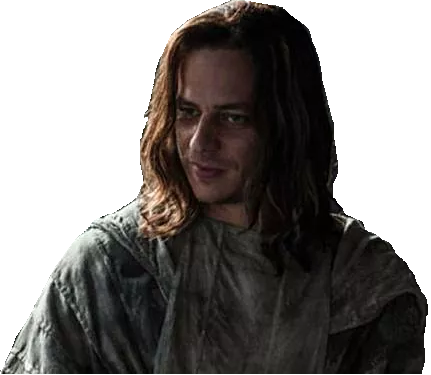

## $$ \bullet\textbf{ Μαρής Ιωάννης - mail} : \color{red}{\text{math}}\color{black}{5666}\textbf{@$\color{red}{\text{math}}$.uoc.gr}$$

------------